# Exemplo de programa para capturar as formas de onda do osciloscópio

## 1.Inicialização

In [2]:
'''importa as bibliotecas necessárias'''
import pylef   # importar pylef 
import visa    # importar a bilioteca pyVISA para lidar com virtualização de instrumentos
import matplotlib.pyplot as plt  # importar a bilioteca pyplot para fazer gráficos
import numpy as np   # importar a biblioteca Numpy para lidar com matrizes
import time          # importar a bilioteca para funções temporais
import pandas as pd   # importa bilioteca pandas para  lidar com processamento de dados
import os            # biblioteca para lidar com diretórios
# próxima linha faz plotar o gráfico dentro do notebook
%matplotlib inline   

In [ ]:
# imprime os recursos para ter certeza que os instrumentos estão conectados
visa.ResourceManager().list_resources()

In [ ]:
'''Inicializa classes para controlar instrumentos'''
scope = pylef.TektronixTBS1062()   # definição do osciloscópio

## 2. Captura das ondas do osciloscópio
<span style='color:red'>Você deverá configurar manualmente o gerador de funções e as escalas (horizontais e verticais) do osciloscópio.

Você pode simplesmente capturar as formas de onda para variáveis locais:

In [ ]:
### Capturando o canal 1
t1, V1 = scope.ch1.read_channel()   # adquire dados de tensão por tempo
plt.plot(t1, V1,'.')   # plot V x t
plt.xlabel('Tempo (s)')
plt.ylabel('Tensão (V)')
plt.show()       # mostra o gráfico

In [ ]:
### Capturando o canal 2
t2, V2 = scope.ch2.read_channel()   # adquire dados de tensão por tempo
plt.plot(t2, V2,'.')   # plot V x t
plt.xlabel('Tempo (s)')
plt.ylabel('Tensão (V)')
plt.show()       # mostra o gráfico

<span style='color:red'>Ou, caso as formas de onda mostradas na tela do osciloscópio estejam de acordo com o seu desejo, salve-as diretamente utilizando o comando abaixo:</span>

<span style='color:red'>Anote o nome do arquivo salvo em seu caderno, e todos os parâmetros relevantes que correspondem ao arquivo</span>

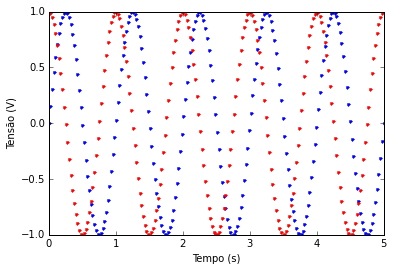

Pasta atual: /Users/gsw/Dropbox/Disciplinas/f429/2017_1s/python
Nome da figura: int_dif/exp_2_v1v2_time_21_53_36.png
Nome da tabela de dados: int_dif/exp_2_v1v2_time_21_53_36.dat


In [24]:
#-----------------------
#salva os dois canais do osciloscópio
t1, V1 = scope.ch1.read_channel()
t2, V2 = scope.ch2.read_channel()
plt.plot(t1, V1,'b.',label='V1')   # plot V x t
plt.plot(t2, V2,'r.',label='V2')   # plot V x t
plt.xlabel('Tempo (s)')
plt.ylabel('Tensão (V)')
fig=plt.gcf()
plt.show()
#-----------------------
#gerando tabelas pandas
dados = pd.DataFrame()   # inicializa um dataframe do pandas
dados['t (s)'] = t1 # note que t1 e t2 devem ser iguais!
dados['V1 (V)'] = V1
dados['V2 (V)'] = V2
#-----------------------
## parametros de varredura
PATH = 'int_dif/'     # pasta onde salvar todos os arquivos
## Não coloque .dat aqui, pois as extensões são adicionadas automaticamente
nome_arquivo = 'exp_2'    # nome prefixo dos arquivos  
##--------------------------------------------------------
##------------SALVANDO ARQUIVOS------------
##--------------------------------------------------------
#Cria a pasta no computador, veja a variável PATH
try: 
    os.makedirs(PATH)     # tenta fazer nova pasta, caso ela não exista
except OSError:
    if not os.path.isdir(PATH):
        raise
#qual pasta estou?
print('Pasta atual:',os.getcwd())  
#gerando um sufixo de tempo para evitar arquivo com nome duplicado
time_suf = time.strftime('_%H_%M_%S', time.localtime(time.time())) 
nome_fig = PATH + nome_arquivo + '_v1v2' + '_time' + time_suf + '.png'
nome_dat = PATH + nome_arquivo + '_v1v2' + '_time' + time_suf + '.dat'
#----------------------
#figura
fig.savefig(nome_fig, bbox_inches = 'tight')
print('Nome da figura:', nome_fig)  
#-----------------------
#tabela de dados
dados.to_csv(nome_csv, sep = '\t', index=False)   # \t significa que o separador é uma tabulação, index=False remove os indices da coluna
print('Nome da tabela de dados:', nome_dat) 